## 对象
- 一切都是对象
  - R中存储的数据成为对象object，R语言数据处理实际上就是不断的创建和操控这些对象。
- 对象的创建和使用
  - 创建一个R对象，首先确定一个名称，然后使用赋值操作符 <-，将数据赋值给它

#### 对象属性
所有R对象都有其属性，其中最重要的两个属性是类型和长度

In [5]:
x  <- 123
typeof(x) # 类型
length(x) # 长度

[1] "double"

[1] 1

## 向量
- 向量就像冰糖葫芦
  - 可以用 c() 函数实现类似结构

In [6]:
x <- c(3,4,5,6,7)
typeof(x)
length(x)

# 这里的c就是 combine 或 concatenate 的意思
# 它要求元素之间用英文的逗号分隔
# 且元素的数据类型是统一的，比如这里都是数值
# c() 函数把一组数据聚合到了一起，就构成了一个向量。

[1] "double"

[1] 5

- 聚合成新向量
  - c() 函数还可以把两个向量聚合成一个新的向量。

In [7]:
low  <- c(1,2,3)
high <- c(4,5,6)
sequence <- c(low, high)
sequence

[1] 1 2 3 4 5 6

- 命名向量
  - 相比与向量c(5, 6, 7, 8)， 每个元素可以有自己的名字
  - 个人评价：类似于`python`中的字典——键值对

In [8]:
x <- c('a'=5, 'b'=6, 'c'=7, 'd'=8)
x

a b c d 
5 6 7 8

In [9]:
# 或者
x <- c(5,6,7,8)
names(x) <- c('a','b','c','d')
x

a b c d 
5 6 7 8

### 数值型向量
- 向量的元素都是数值类型，因此也叫数值型向量。
  - 数值型的向量，有 integer 和 double 两种

In [37]:
x  <- c(1,5,2,3)
typeof(x)
x <- c(1.5,-0.5,2,3)
class(x)
x <- c(3e+06, 1.23e2)
class(x)

[1] "double"

[1] "numeric"

[1] "numeric"

   - seq() 函数可以生成等差数列，
   - from 参数指定数列的起始值，to 参数指定数列的终止值，by 参数指定数值的间距

In [15]:
s1  <- seq(from=0, to=10, by=0.5)
s1

[1]  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0
[16]  7.5  8.0  8.5  9.0  9.5 10.0

   - rep() 是 repeat（重复）的意思，可以用于产生重复出现的数字序列：
   - x 用于重复的向量，times 参数可以指定要生成的个数，each 参数可以指定每个元素重复的次数

In [16]:
s2 <- rep(x=c(0,1), times=3)
s2

s3 <- rep(x=c(0,1), each=3)
s3

[1] 0 1 0 1 0 1

[1] 0 0 0 1 1 1

  - m:n，如果单纯是要生成数值间距为1的数列，用 m:n 更快捷，
  - 它产生从 m 到 n 的间距为1的数列

In [17]:
s4 <- 0:10
s4

[1]  0  1  2  3  4  5  6  7  8  9 10

### 字符串向量
- 字符串（String）数据类型，实际上就是文本类型，必须用单引号或者是双引号包含

In [18]:
x <- c("a", "b", "c")    
x <- c('Alice', 'Bob', 'Charlie', 'Dave')    
x <- c("hello", "baby", "I love you!") 

In [35]:
## x1是字符串型向量，x2是数值型向量
x1 <- c("1", "2", "3")
x2 <- c(1, 2, 3)
class(x1)
class(x2)

[1] "character"

[1] "numeric"

### 逻辑型向量
- 逻辑型常称为布尔型（Boolean）， 它的常量值只有`TRUE`和`FALSE`。
- TRUE和FALSE必须都大写

### 因子型向量
- 因子型可以看作是字符串向量的增强版，它是带有层级（Levels）的字符串向量。
- 使用`factor()`函数可以将字符串向量转换成因子型向量，即可用`levels`参数指定顺序

In [24]:
four_seasons <- c("spring", "summer", "autumn", "winter")
four_seasons
typeof(four_seasons)

four_seasons_factor <- factor(four_seasons, 
                             levels = c("summer", "winter", "spring", "autumn"))
four_seasons_factor
typeof(four_seasons_factor)

[1] "spring" "summer" "autumn" "winter"

[1] "character"

[1] spring summer autumn winter
Levels: summer winter spring autumn

[1] "integer"

### 强制转换
- 矢量中的元素必须是相同的类型，但如果不一样呢，会发生什么？ 
- 这个时候R会强制转换成相同的类型。这就涉及数据类型的转换层级
  - character > numeric > logical
  - double > integer

In [28]:
c(1, "foo", TRUE) # 强制转换成字符串类型
c(7, TRUE, FALSE) # 强制转换成数值型
c(1L, 2, pi) # 强制转换成双精度的数值型

[1] "1"    "foo"  "TRUE"

[1] 7 1 0

[1] 1.000000 2.000000 3.141593

## 数据结构
- 向量
- 矩阵 matrix
- 列表 list
- 数据框 dataframe

### 矩阵
- 矩阵可以存储行(row)和列(column)二维的数据。
- 实际上是向量的另一种表现形式，也就说它的本质还是向量，一维的向量用二维的方式呈现
- 矩阵可以用`matrix()`函数创建，第一个位置的参数是用于创建矩阵的向量
- 默认情况是竖着排，第一列排完再第二列这样，可用`byrow=TRUE`指定横着排，第一行排完排第二行

In [40]:
m <- matrix(c(2,4,3,1,5,7),
           nrow=2,
           ncol=3)
m

m1 <- matrix(c(2,4,3,1,5,7),
            nrow=2,
            ncol=3,
            byrow=TRUE)
m1
class(m1) # 类型
length(m1) # 长度
dim(m1) # 维度

2,3,5
4,1,7


2,4,3
1,5,7


[1] "matrix" "array"

[1] 6

[1] 2 3

### 列表
- 如果我们想要装更多的东西，可以想象有一个小火车，小火车的每节车厢是独立的，因此每节车厢装的东西可以不一样。这种结构装载数据的能力很强大，称之为列表。
  - 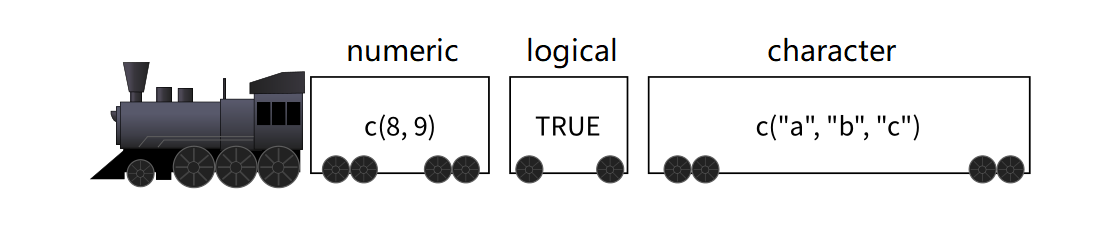
- 我们可以使用`list()`函数创建列表，和python的list不太一样
- `c()`函数创建向量 对比`list()`函数创建列表
  - 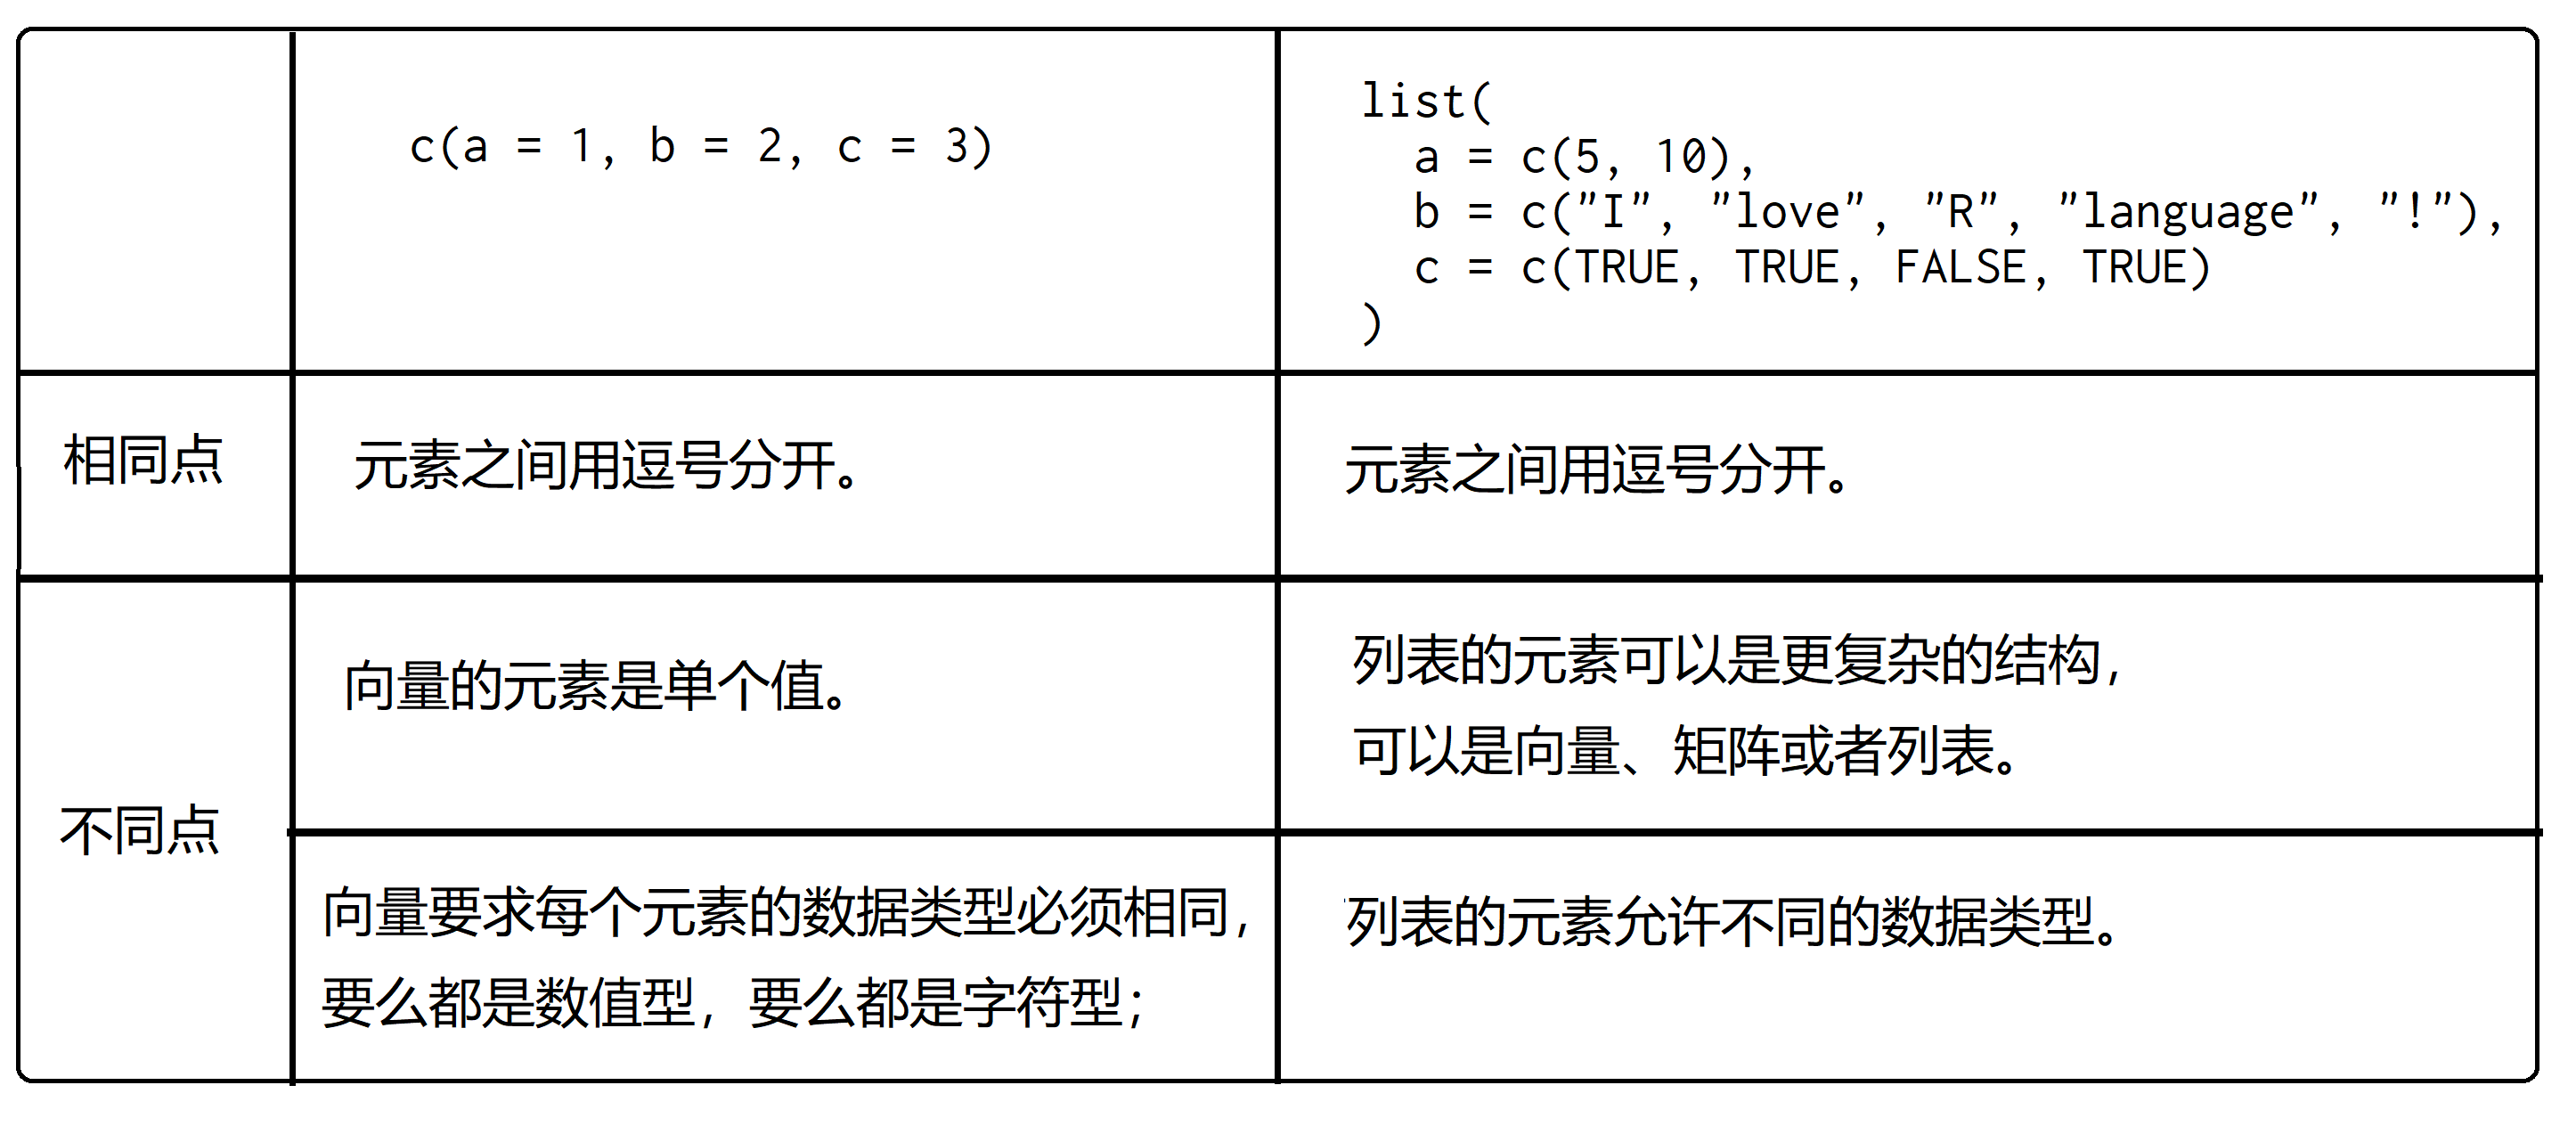

In [44]:
list1 <- list(a=c(5, 10),
             b=c("I", "love", "R", "language", "!"),
             c=c(TRUE, TRUE, FALSE, TRUE))
list1
list1$a
list1$`b[2]

$a
[1]  5 10

$b
[1] "I"        "love"     "R"        "language" "!"       

$c
[1]  TRUE  TRUE FALSE  TRUE

[1]  5 10

[1] "love"

### 数据框
- 列表可以想象成一个小火车，如果每节车厢装的都是向量而且等长，那么这种特殊形式的列表就变成了数据框
- 数据框是一种特殊的列表，我们可以使用`data.frame()`函数构建数据框

#### 属性

In [48]:
df <- data.frame(
name = c("Alice", "Bob", "Carl", "Dave"),
age = c(3, 34, 23, 25),
marriage = c(TRUE, FALSE, TRUE, FALSE),
color = c("red", "blue", "orange", "purple")
)
df
class(df) # 类型
nrow(df)  # 维度
ncol(df)  # 维度


name,age,marriage,color
<chr>,<dbl>,<lgl>,<chr>
Alice,3,TRUE,red
Bob,34,FALSE,blue
Carl,23,TRUE,orange
Dave,25,FALSE,purple


[1] "data.frame"

[1] 4

[1] 4

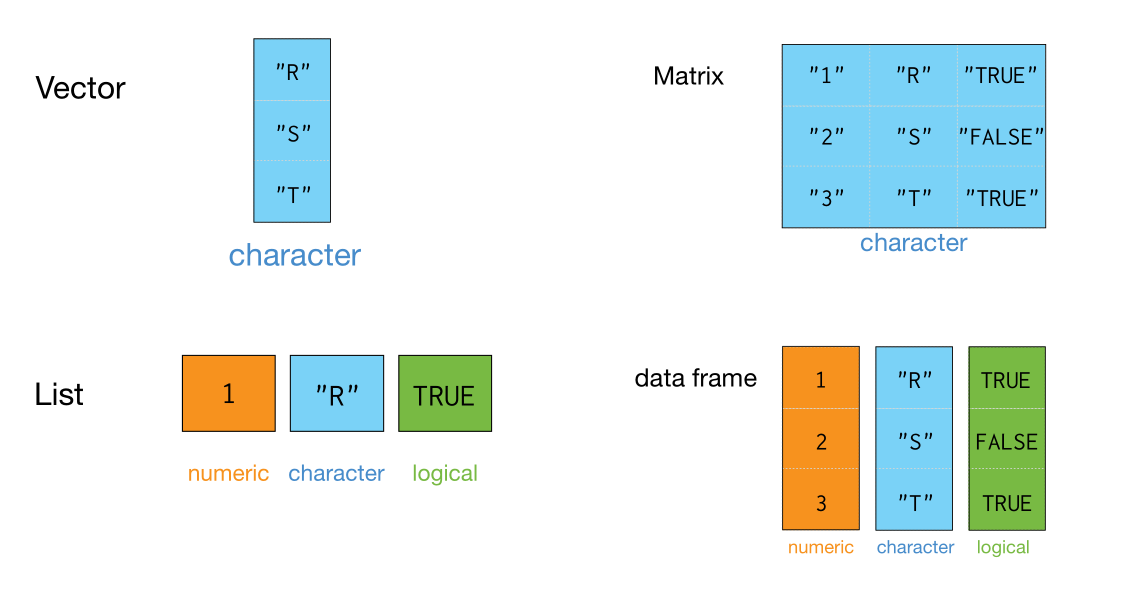

## 运算符及向量运算
- 算数运算符  + - x ➗
- 关系运算符  = > < !=
- 逻辑运算符 & |
- 其他运算符

### 算数运算符
- `+ - * / `
- 循环补齐
  - 做算术运算时，当两个向量长度相等的时候，就一一对应的完成计算；
  - 当两个向量长度不相等的时候，短的向量会`循环补齐`，保持与长向量的长度一致后，再做运算
  - 需要长向量是短向量的整数倍才能运算

In [50]:
x <- c(1,2)
y <- c(10,20,30,40)
x+y

[1] 11 22 31 42

### 关系运算符
- 将第一向量的每个元素与第二向量的相应元素进行比较，比较的结果是布尔值，布尔值是“真” TRUE 或“假” FALSE 中的一个。
- `<  >  = !=`

In [52]:
# 检查第一个向量的每个元素是否等于第二个向量的相应元素。
a <- c(1, 2, 3)
b <- c(4, 5, 6)
a == b

[1] FALSE FALSE FALSE

### 逻辑运算符
- 一般适用于逻辑类型的向量
- `& | !` ! 为逻辑非运算符。 对于向量的每个元素，给出相反的逻辑值。
- 逻辑运算符`&&`和`||`只考虑向量的第一个元素，给出单个元素的向量作为输出

In [55]:
a <- c(TRUE, FALSE, FALSE)
!a

a <- c(TRUE, FALSE, FALSE)
b <- c(FALSE, TRUE, FALSE)
a && b

a <- c(TRUE, FALSE, FALSE)
b <- c(FALSE, TRUE, FALSE)
a || b

[1] FALSE  TRUE  TRUE

Warning message in a && b:
“'length(x) = 3 > 1' in coercion to 'logical(1)'”
Warning message in a && b:
“'length(x) = 3 > 1' in coercion to 'logical(1)'”


[1] FALSE

Warning message in a || b:
“'length(x) = 3 > 1' in coercion to 'logical(1)'”


[1] TRUE

### 其他运算符
- `:`冒号运算符。按顺序创建一个**整数**序列
- `%in%` 此运算符用于判断元素是否属于向量
- `is.na()`判断是否为缺失值，`R` 里缺失值用`NA`表示，`NA`的意思就是 `not available` 或者 `not applicable`.

In [64]:
# :
a <- 1:10
a
typeof(a)

# %in%
c(2,3,7) %in% c(1,2,3,4,5)

# is.na()
is.na(c(1,2,3,NA,4,NA,5))
x <- c(1,2,NA,4,NA,6)
!is.na(x)

[1]  1  2  3  4  5  6  7  8  9 10

[1] "integer"

[1]  TRUE  TRUE FALSE

[1] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE

[1]  TRUE  TRUE FALSE  TRUE FALSE  TRUE

- `seq()`函数也能产生序列
- 注意到a是整数类型，而b是双精度的数值型

In [61]:
b <- seq(1,10,1)
b
typeof(b)

[1]  1  2  3  4  5  6  7  8  9 10

[1] "integer"

### 特殊值
- R 语言里还有一些特殊的值: `Inf, NaN, NA 和 NULL`
- `Inf`, 是Infinity的简写，表示无限大；`-Inf`表示无限小
- `NaN`, 是Not a Number的简写，表示这个数字没有数学定义
- `NA`, 是Not available的简写，表示缺失状态
- `NULL`, 是No value的意思，表示没有值，或者空值的意思，表示变量实际上没有任何值，或者甚至不存在。

In [71]:
# Inf
1/0
-1/0

# NaN
0/0

# NULL
c( )

# NA
c(1,NA,3)

[1] Inf

[1] -Inf

[1] NaN

NULL

[1]  1 NA  3

In [72]:
a <- 1:10
b <- seq(1,10,1)

identical(a,b)

[1] FALSE

## 函数
### 基础函数
- `print()`     打印
- `sqrt()`    求开方
- `sd()`  标准差函数
- `log()`      求自然对数
- `sum()`      求和
- `mean()`     求平均值
- `min()`      最小值
- `max()`      最大值
- `length()`    计算向量个数
- `sort()`     排序
- `nique()`    去重
- `quantile()`   求分位数
- `is.numeric()` 判断是否为数值型
- `is.character()` 判断是否为字符串型
- `as.character()` 转为字符串型

### 向量的函数
- 用在向量上的函数，可以分为向量化函数(vectorized function)和汇总类函数(summary function)
- 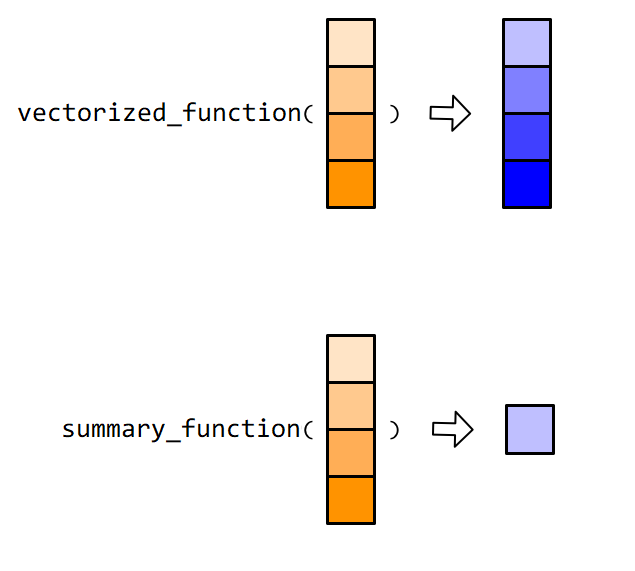
- 这两类函数在`Tidyverse`框架中，应用非常广泛。
- 当然，也会有例外，比如`unique()`函数，它返回的向量通常不会与输入的向量等长，既不属于向量化函数，也不属于汇总类函数。

In [76]:
x <- c(2,7,8,9,3)
x^2 + 5

sort(x)

x - mean(x)

# 向量标准化（向量减去其均值之后，除以标准差）
(x -mean(x))/sd(x)

[1]  9 54 69 86 14

[1] 2 3 7 8 9

[1] -3.8  1.2  2.2  3.2 -2.8

[1] -1.2201065  0.3852968  0.7063774  1.0274581 -0.8990258

### 自定义函数
- **创建**，由`function(...)`创建一个函数
- **参数**，由`(...)`里指定参数，比如`function(x)`中的参数为 `x`
- **函数主体**，一般情况下，在`function(...)`后跟随一对大括号`{ }`，在大括号里声明具体函数功能，在代码最后一行，可以用`return`返回计算后的值。当然，如果函数的目的只是返回最后一行代码计算的值，这个`return`可以省略。
- **函数名**，`function() { }`赋值给新对象，比如这里的`my_std`，相当于给函数取一名字，方便以后使用。
- **函数调用**，现在这个函数名字叫`my_std`，需要用这个函数的时候，就调用它的名字`my_std()`。

和`python`的`def`创建的函数差不多，创建形式不同，但应用方式一样，元素差不多

In [79]:
y <- c(2,7,8,9,3)

my_std <- function(x){
    (x - mean(x)) / sd(x)
}

my_std(y)

[1] -1.2201065  0.3852968  0.7063774  1.0274581 -0.8990258

- 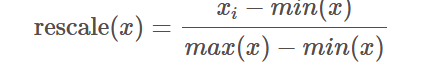

In [81]:
rescale <- function(x){
    (x - min(x)) / (max(x) - min(x))
}

### 使用宏包的函数
#### 安装宏包与使用宏包
- 安装宏包 `install.packages("dplyr")`，也就是说宏包就是别人已经写好了的函数的集合
- 加载 `library("dplyr")`，和python中的`import pandas`一样的效果‘pandas’为包
#### 指定函数的所属宏包
- 其它宏包可能也有`select()`函数，比如`MASS`和`skimr`，如果同时加载了`dplyr`，`MASS`和`skimr`三个宏包，在程序中使用`select()`函数，就会造成混淆和报错。
- 这个时候就需要给每个函数指定是来源哪个宏包，具体方法就是在宏包和函数之间添加::，
- 比如`dplyr::select()`，`skimr::select()` 或者`MASS::select()`。

### 获取帮助

In [84]:
?sqrt()
?scale()

In [97]:
get_var <- function(x){
    n <- length(x)
    y <- mean(x)
    var2 <- sum((x - y)^2) / (n - 1)
    return(var2)
}

var(c(2,4,6,8,10))
get_var(c(2,4,6,8,10))

[1] 10

[1] 10

In [91]:
get_bmi <- function(height, weight){
    weight / height^2
}
get_bmi(165, 65)

[1] 0.002387511

In [108]:
mean_above_threshod <- function(vector, threshod){
    upthreshod <- vector[vector > threshod]
    if(length(upthreshod) == 0){
        return("NA")
    }else{return(mean(upthreshod))
         }
}

vector <- c(2,3,4,5,6)
threshod <- 6
mean_above_threshod(vector, threshod)

[1] "NA"

## 函数应用
### 灵活的语法
- R语言中，完成一件事情往往有很多种方法

### 多个参数

### 条件语句
- `if-else`语句
  - `if(condition){
   Do something
} else{
    Alternative something
}`

### 返回多个结果
- 如果要返回多个统计结果，可以把结果先放在`list`或者`data.frame`中，然后再返回

### 函数默认值
- `function(multi = 10)`这样的表达式

In [109]:
### 灵活的语法
mysquare <- function(x){
    y <- x^2
    return(y)
}

mysquare2 <- function(x){
    return(x^2)
}

mysquare3 <- function(x){ return(x^2) }

mysquare4 <- function(x) return(x^2)

mysquare5 <- function(x){
    x^2
}

mysquare6 <- function(x) x^2

In [111]:
### 多个参数
sum_two <- function(num1, num2){
    sum <- num1 + num2
    return(sum)
}
sum_two(num1 = 1, num2 = 2)
sum_two(1, 2)

[1] 3

[1] 3

In [114]:
### 条件语句
square_if <- function(num){
    if (is.numeric(num)){
        num^2
    } else{
        "Your input is not numeric."
    }
}

square_if("a")
square_if(3)

[1] "Your input is not numeric."

[1] 9

In [119]:
sum_two <- function(num1, num2){
    if(is.numeric(num1) & is.numeric(num2)){
        sum <- num1 + num2
        return(sum)
    } else{
        print("Your input is not numeric.")
    } 
}
sum_two(1, 2)
sum_two(1,"x")

[1] 3

[1] "Your input is not numeric."


In [124]:
### 多个条件
check_number <- function(x){
    if (x < 0){
        print("Negative number")
    } else if (x > 0){
        print("Positive number")
    } else{
        print("Zero")
    }
}

x <- 0
check_number(x)

[1] "Zero"


In [126]:
### 返回多个结果
mystat <- function(x){
    meanval <- mean(x)
    sdval <- sd(x)
    list(sd=sdval, mean=meanval)
}

mystat2 <- function(x){
    meanval <- mean(x)
    sdval <- sd(x)
    data.frame(
    sd=sdval,
    mean=meanval
    )
}

## 子集选取
-  对象就是我们在计算机里新建了存储空间，好比一个盒子， 我们可以往盒子里面装东西（赋值），可以查看里面的内容或者对里面的内容做计算（函数），也可以从盒子里取出**部分东西**（子集选取）
- **子集选取**，就是从盒子里取东西出来


### 向量
- 对于原子型向量，我们有至少四种选取子集的方法
  - 正整数： 指定向量元素中的位置 `x[1]`
  - 负整数：删除指定位置的元素 `x[-2]`
  - 逻辑向量：将`TRUE`对应位置的元素提取出来`x[x > 3]`
  - 我们可以用命名向量，返回其对应位置的向量
### 列表
- 对列表取子集，和向量的方法一样。向量的子集仍然是向量，使用`[`提取列表的子集，总是返回列表
- 如果想提取列表某个元素的值，需要使用`[[`
- 取出`one`位置上的元素，需要写`[["one"]]`，太麻烦了，所以用`$`来简写
- `x$y` 是 `x[["y"]]`的简写

In [137]:
l <- list(
"one" = c("a", "b", "c"),
"two"   = c(1:5),
"three" = c(TRUE, FALSE)
)
l 
l[1]       # 使用位置索引
l["one"]   # 使用元素名
l[[1]]     # 提取列表某个元素的值
l$one

$one
[1] "a" "b" "c"

$two
[1] 1 2 3 4 5

$three
[1]  TRUE FALSE

$one
[1] "a" "b" "c"

$one
[1] "a" "b" "c"

[1] "a" "b" "c"

[1] "a" "b" "c"

### 矩阵
- `x[a,b]`用于选取，`a`为行方向，`b`为列方向
- `x[a, ]`,表示列方向选取所有列，反之
- `x[, ]` `x[]`，表示取整个矩阵

In [144]:
a <- matrix(1:9, nrow=3, byrow=TRUE)
a

a[1:2, 2:3] # 我们取第1行到第2行的2-3列
a[1, 1:2]   # 默认情况下, [ 会将获取的数据，以尽可能低的维度形式呈现
a[1:2, ]   # 列方向，选取所有列
a[]

1,2,3
4,5,6
7,8,9


2,3
5,6


[1] 1 2

1,2,3
4,5,6


1,2,3
4,5,6
7,8,9


### 数据框
- 数据框具有`list`和`matrix`的双重属性，因此
  - 当选取数据框的某几列的时候，可以和list一样，指定元素位置索引，比如`df[1:2]`选取前两列
  - 也可以像矩阵一样，按照行和列的标识选取，比如`df[1:3, ]`选取前三行的所有列
  - 当遇到单行或单列的时候，也和矩阵一样，数据会降维
  - 如果想避免降维，需要多写一句话`df[, "x", drop = FALSE]`

In [16]:
df <- data.frame(
x=1:4,
y=4:1,
z=c("a", "b", "c", "d")
)
df
df["x"]

x,y,z
<int>,<int>,<chr>
1,4,a
2,3,b
3,2,c
4,1,d


x
<int>
1
2
3
4


In [2]:
# like a list
df[1:2]
df[["x"]]
df$x

x,y
<int>,<int>
1,4
2,3
3,2
4,1


[1] 1 2 3 4

[1] 1 2 3 4

In [9]:
# like a matrix
df[,c("x","z")]
df[,1:3]
df[, "x", drop=FALSE]

x,z
<int>,<chr>
1,a
2,b
3,c
4,d


x,y,z
<int>,<int>,<chr>
1,4,a
2,3,b
3,2,c
4,1,d


x
<int>
1
2
3
4


### 增强型数据框
- `tibble`是增强型的`data.frame`，
- 选取`tibble`的行或者列，即使遇到单行或者单列的时候，数据也不会降维，总是返回`tibble`，即仍然是数据框的形式。

In [10]:
tb <- tibble::tibble(
x=1:4,
y=4:1,
z=c("a", "b", "c", "d"))
tb

x,y,z
<int>,<int>,<chr>
1,4,a
2,3,b
3,2,c
4,1,d


In [13]:
tb["x"]
tb[,"x"]

x
<int>
1
2
3
4


x
<int>
1
2
3
4


In [19]:
mt <- matrix(1:9, nrow=3)
mt
mt[1,3]

1,4,7
2,5,8
3,6,9


[1] 7

In [29]:
x <- c(3, 5, NA, 2, NA)
x_missing <- is.na(x)
x[x_missing] <- 0
x

[1] 3 5 0 2 0

## 可重复性文档
### 什么是`Rmarkdown`
- 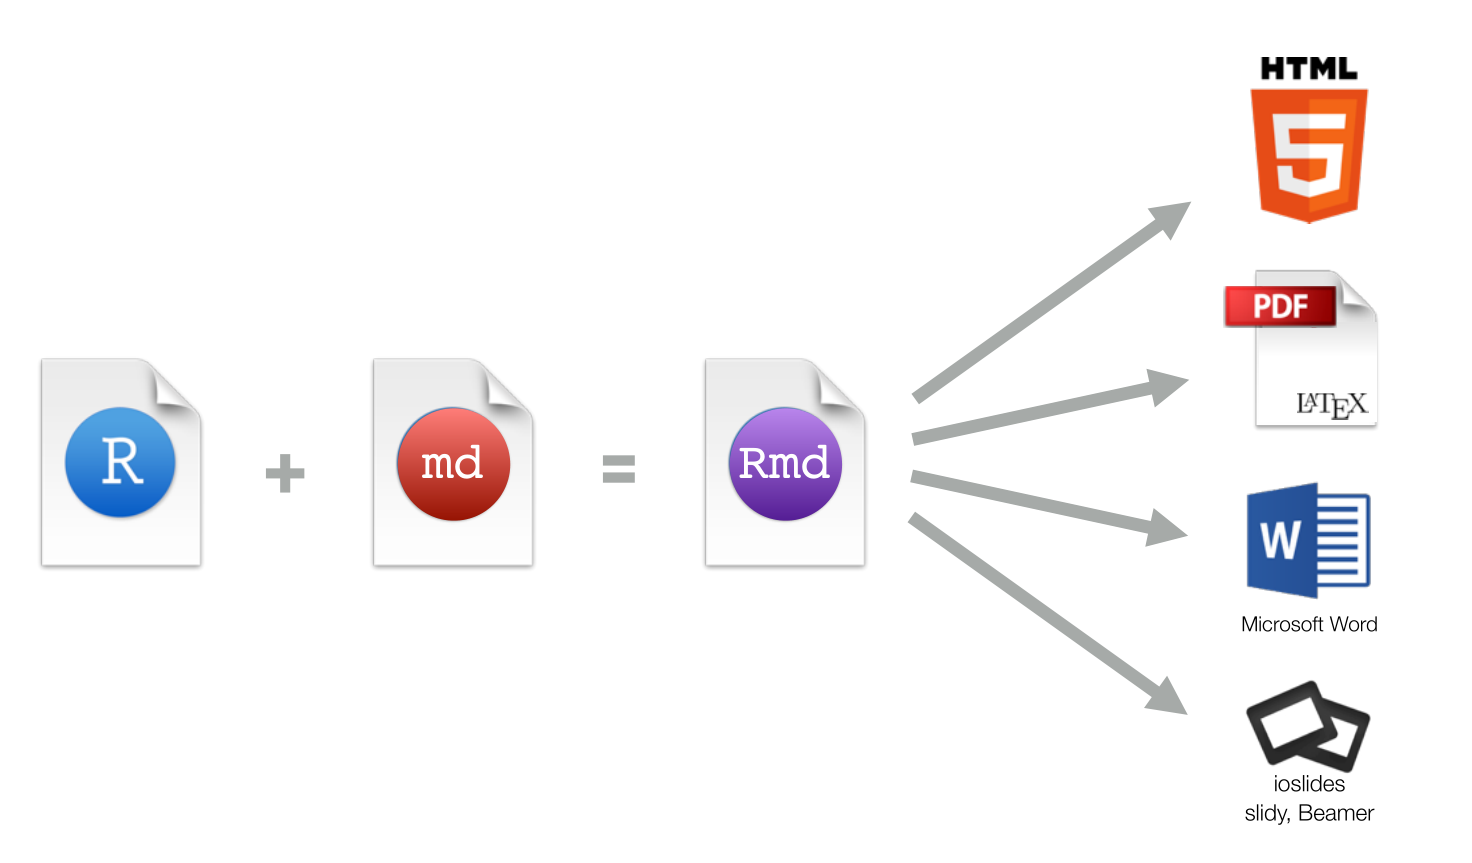
### `markdown` 基本语法
- 如果想制作简单表格，
  - 列与列之间用 `|` 分隔，表格的首行下面添加`--------`
- 如果想添加网页链接，可以用方括号和圆括号
  - `[Download R](http://www.r-project.org/)`

In [ ]:
# This is a title

#  第一章   （注意   "#" 与 "第一章"之间有空格）
##  第一节  （同上，"##" 与 "第一节"之间有空格）

This is a sentence.

Now a list begins:
  
- no importance
- again
- repeat
  
A numbered list:
  
1. first
2. second

__bold__, _italic_, ~~strike through~~

Table Header  | Second Header
------------- | -------------
Cell 1, 1    | Cell 2, 1
Cell 1, 2    | Cell 2, 2

###  R Code chunks
- 在`Rmd`文档中写`R`代码，需要插入代码块(`Code chunks`)，具体以 ` ```{r} ` 开始，以 ` ``` `结尾。可以用快捷方式`Ctrl + Alt + I` (OS X: `Cmd + Option + I`)创建代码块。

### 生成`html`文档
- 希望`html`文档有章节号、目录或者更好显示表格，可以修改`yaml`头文件（用下面的内容替换`Rmarkdown`的头文件）

In [ ]:
---
title: Habits
author: John Doe
date: "2023-07-18"
output: 
  html_document:
    df_print: paged
    toc: yes
    number_sections: yes
---

### 生成`word`文档
### 生成`pdf`文档

## 读取数据
- 在学习R语言过程中，除了使用内置的数据集外，我们更多的需要导入外部数据
### 数据科学中的文件管理
- 把项目所需的文件（代码、数据、图片等），放在一个文件夹里
- 项目文件结构
  - 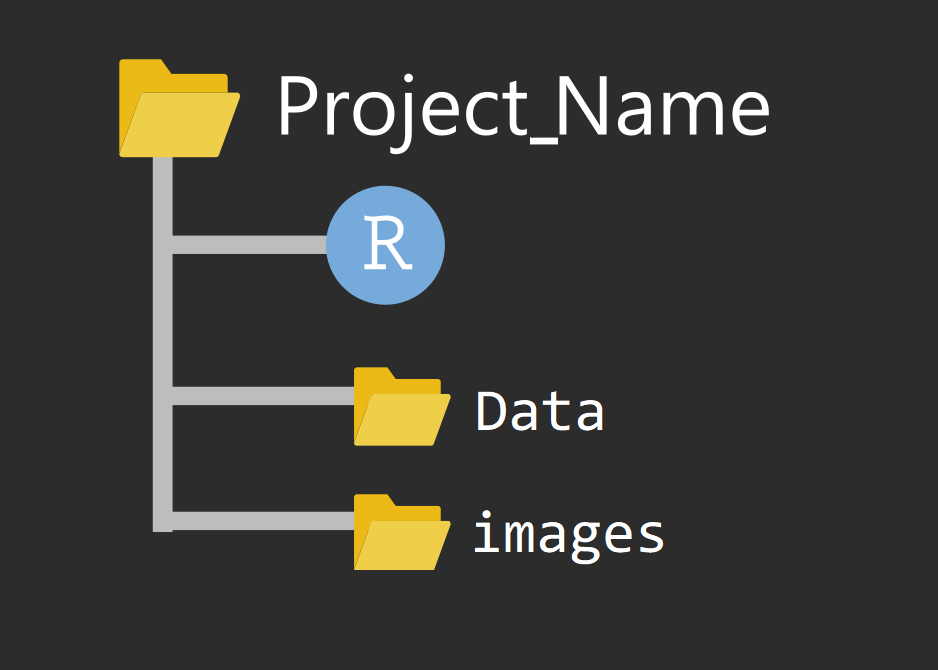

- 读取文件
  - 事实上，R语言提供了很多读取数据的函数。下表列出了常见文件格式的读取方法

文件格式   |   R函数
----------- | ------------
txt	| read.table()
.csv	| read.csv() and readr::read_csv()
.xls and .xlsx	| readxl::read_excel() and openxlsx::read.xlsx()
.sav(SPSS files)	| haven::read_sav() and foreign::read.spss()
.Rdata or rda	| load()
.rds	| readRDS() and readr::read_rds()
.dta	| haven::read_dta() and haven::read_stata()
.sas7bdat(SAS files)	| haven::read_sas()
Internet	| download.file()

### `here`宏包
- 强大的`here`宏包，`here()`会告诉我们当前所在的目录
- 指向某个文件的路径信息
- `here`宏包的好处还在于，在不同的电脑和文件结构下，代码都能运行

In [32]:
here::here()

[1] "/public/home/sll"

In [36]:
here::here("software", "smoove")
d <- read.table(file= "./data/txt_file.txt", header = TRUE)

[1] "/public/home/sll/software/smoove"

In [39]:
library(readr)
url <- "https://raw.githubusercontent.com/perlatex/R_for_Data_Science/master/demo_data/wages.csv"
d <- read_csv(url)

ERROR: Error in open.connection(structure(4L, class = c("curl", "connection"), conn_id = <pointer: 0x383>), : Failed to connect to raw.githubusercontent.com port 443 after 7 ms: Couldn't connect to server
